In [105]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = yf.download('BTC-USD', start='2016-01-01', end='2022-10-26')
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-21,19053.203125,19237.384766,18770.970703,19172.468750,19172.468750,32459287866
2022-10-22,19172.380859,19248.068359,19132.244141,19208.189453,19208.189453,16104440957
2022-10-23,19207.734375,19646.652344,19124.197266,19567.007812,19567.007812,22128794335
2022-10-24,19567.769531,19589.125000,19206.324219,19345.572266,19345.572266,30202235805
2022-10-25,19344.964844,20348.412109,19261.447266,20095.857422,20095.857422,47761524910


In [106]:
import plotly.express as px
fig = px.line(stock_data['Close'],title='Stock Prices History')
fig.show()

In [107]:
import plotly.graph_objects as go

In [108]:

candlestick  = go.Candlestick(
                x=stock_data.index,
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close'])

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=1000, height=1000,
    title="BTC-USD",
    yaxis_title='BTC',
)

fig.show()

Text(0, 0.5, 'Prices ($)')

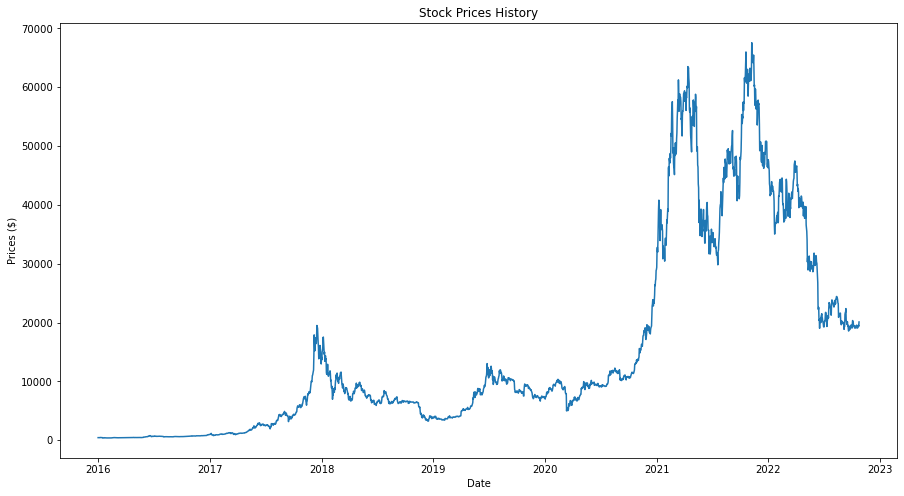

In [109]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

### high price 

In [110]:
#high price 
high_prices = stock_data['High']
values_h = high_prices.values
training_data_len = math.ceil(len(values_h)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_h = scaler.fit_transform(values_h.reshape(-1,1))

train_data_h = scaled_data_h[0: training_data_len, :]

x_train_h = []
y_train_h = []

for i in range(60, len(train_data_h)):
    x_train_h.append(train_data_h[i-60:i, 0])
    y_train_h.append(train_data_h[i, 0])
    
x_train_h, y_train_h = np.array(x_train_h), np.array(y_train_h)

x_train_h = np.reshape(x_train_h, (x_train_h.shape[0], x_train_h.shape[1], 1))

In [111]:
values_h

array([  432.92098999,   436.2460022 ,   436.06201172, ...,
       19646.65234375, 19589.125     , 20348.41210938])

In [112]:
test_data_h = scaled_data_h[training_data_len-60: , : ]
x_test_h = []
y_test_h = values_h[training_data_len-60:]

for i in range(60, len(test_data_h)):
    x_test_h.append(test_data_h[i-60:i, 0])

x_test_h = np.array(x_test_h)
x_test_h = np.reshape(x_test_h, (x_test_h.shape[0], x_test_h.shape[1], 1))

In [113]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_h.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=True))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_19 (LSTM)              (None, 60, 100)           80400     
                                                                 
 lstm_20 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 25)                2525      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 204,151
Trainable params: 204,151
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')
model_h=model.fit(x_train_h, y_train_h, batch_size= 1, epochs=20)

Epoch 1/20
1933/1933 [==============================] - 58s 28ms/step - loss: 0.0044
Epoch 2/20
1933/1933 [==============================] - 71s 37ms/step - loss: 9.8997e-04
Epoch 3/20
1933/1933 [==============================] - 74s 38ms/step - loss: 8.5230e-04
Epoch 4/20
1933/1933 [==============================] - 72s 37ms/step - loss: 5.7031e-04
Epoch 5/20
1933/1933 [==============================] - 68s 35ms/step - loss: 5.2889e-04
Epoch 6/20
1933/1933 [==============================] - 77s 40ms/step - loss: 0.0012
Epoch 7/20
1933/1933 [==============================] - 74s 38ms/step - loss: 3.2532e-04
Epoch 8/20
1933/1933 [==============================] - 77s 40ms/step - loss: 4.8957e-04
Epoch 9/20
1933/1933 [==============================] - 76s 39ms/step - loss: 3.0413e-04
Epoch 10/20
1933/1933 [==============================] - 68s 35ms/step - loss: 3.8398e-04
Epoch 11/20
1933/1933 [==============================] - 70s 36ms/step - loss: 3.3896e-04
Epoch 12/20
1933/1933 [====

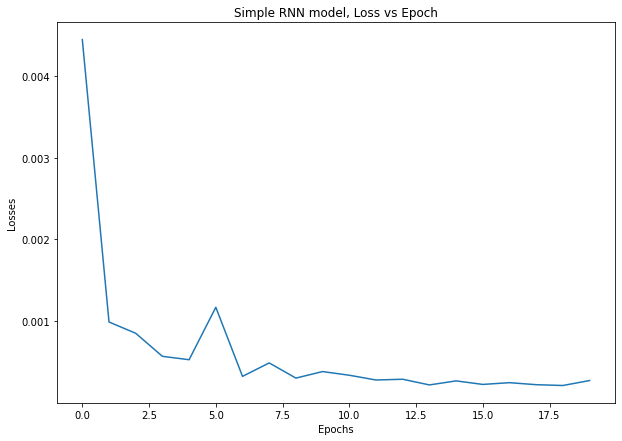

In [115]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(model_h.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [116]:
predictions_h = model.predict(x_test_h)
predictions_h = scaler.inverse_transform(predictions_h)
rmse_h = np.sqrt(np.mean(predictions_h - y_test_h)**2)
rmse_h

16/16 [==============================] - 2s 45ms/step


10.036262362959905

### low price

In [119]:
#low price 
low_prices = stock_data['Low']
values_l = low_prices.values
training_data_len = math.ceil(len(values_l)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_l = scaler.fit_transform(values_l.reshape(-1,1))

train_data_l = scaled_data_l[0: training_data_len, :]

x_train_l = []
y_train_l = []

for i in range(60, len(train_data_l)):
    x_train_l.append(train_data_l[i-60:i, 0])
    y_train_l.append(train_data_l[i, 0])
    
x_train_l, y_train_l = np.array(x_train_l), np.array(y_train_l)

x_train_l = np.reshape(x_train_l, (x_train_l.shape[0], x_train_l.shape[1], 1))

In [120]:
values_l

array([  418.73498535,   427.51501465,   431.86999512, ...,
       19124.19726562, 19206.32421875, 19261.44726562])

In [121]:
test_data_l = scaled_data_l[training_data_len-60: , : ]
x_test_l = []
y_test_l = values_l[training_data_len-60:]

for i in range(60, len(test_data_l)):
    x_test_l.append(test_data_l[i-60:i, 0])

x_test_l = np.array(x_test_l)
x_test_l = np.reshape(x_test_l, (x_test_l.shape[0], x_test_l.shape[1], 1))

In [122]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_l.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=True))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_22 (LSTM)              (None, 60, 100)           80400     
                                                                 
 lstm_23 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 25)                2525      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 204,151
Trainable params: 204,151
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(optimizer='adam', loss='mean_squared_error')
model_l=model.fit(x_train_l, y_train_l, batch_size= 1, epochs=5)

Epoch 1/5
1933/1933 [==============================] - 69s 34ms/step - loss: 0.0040
Epoch 2/5
1933/1933 [==============================] - 68s 35ms/step - loss: 0.0015
Epoch 3/5
1933/1933 [==============================] - 69s 36ms/step - loss: 7.3413e-04
Epoch 4/5
1933/1933 [==============================] - 68s 35ms/step - loss: 9.0065e-04
Epoch 5/5
1933/1933 [==============================] - 67s 35ms/step - loss: 6.1484e-04


In [127]:
predictions_l = model.predict(x_test_l)
predictions_l = scaler.inverse_transform(predictions_l)
rmse_l = np.sqrt(np.mean(predictions_l - y_test_l)**2)
rmse_l

16/16 [==============================] - 2s 32ms/step


2132.6883477289534

### open price 

In [134]:
#open price 
open_prices = stock_data['Open']
values_o = open_prices.values
training_data_len = math.ceil(len(values_o)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_o = scaler.fit_transform(values_o.reshape(-1,1))

train_data_o = scaled_data_o[0: training_data_len, :]

x_train_o = []
y_train_o = []

for i in range(60, len(train_data_o)):
    x_train_o.append(train_data_o[i-60:i, 0])
    y_train_o.append(train_data_o[i, 0])
    
x_train_o, y_train_o = np.array(x_train_o), np.array(y_train_o)

x_train_o = np.reshape(x_train_o, (x_train_o.shape[0], x_train_o.shape[1], 1))

In [135]:
values_o

array([  425.875     ,   430.7210083 ,   434.62200928, ...,
       19207.734375  , 19567.76953125, 19344.96484375])

In [136]:
test_data_o = scaled_data_o[training_data_len-60: , : ]
x_test_o = []
y_test_o = values_o[training_data_len-60:]

for i in range(60, len(test_data_o)):
    x_test_o.append(test_data_o[i-60:i, 0])

x_test_o = np.array(x_test_o)
x_test_o = np.reshape(x_test_o, (x_test_o.shape[0], x_test_o.shape[1], 1))

In [137]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_o.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=True))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_28 (LSTM)              (None, 60, 100)           80400     
                                                                 
 lstm_29 (LSTM)              (None, 100)               80400     
                                                                 
 dense_20 (Dense)            (None, 25)                2525      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 204,151
Trainable params: 204,151
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(optimizer='adam', loss='mean_squared_error')
model_o=model.fit(x_train_o, y_train_o, batch_size= 1, epochs=5)

Epoch 1/5
1933/1933 [==============================] - 57s 27ms/step - loss: 0.0053
Epoch 2/5
1933/1933 [==============================] - 62s 32ms/step - loss: 9.4300e-04
Epoch 3/5
1933/1933 [==============================] - 69s 35ms/step - loss: 0.0014
Epoch 4/5
1933/1933 [==============================] - 69s 35ms/step - loss: 5.5663e-04
Epoch 5/5
1933/1933 [==============================] - 69s 36ms/step - loss: 8.0531e-04


In [139]:
predictions_o = model.predict(x_test_o)
predictions_o = scaler.inverse_transform(predictions_o)
rmse_o = np.sqrt(np.mean(predictions_o - y_test_o)**2)
rmse_o

16/16 [==============================] - 2s 41ms/step


2392.5963755897246

### close price 

In [140]:
#close price 
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [141]:
values

array([  430.56698608,   434.33401489,   433.43798828, ...,
       19567.0078125 , 19345.57226562, 20095.85742188])

In [142]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len-60:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [143]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=True))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_31 (LSTM)              (None, 60, 100)           80400     
                                                                 
 lstm_32 (LSTM)              (None, 100)               80400     
                                                                 
 dense_22 (Dense)            (None, 25)                2525      
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 204,151
Trainable params: 204,151
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
1933/1933 [==============================] - 72s 35ms/step - loss: 0.0042
Epoch 2/5
1933/1933 [==============================] - 69s 35ms/step - loss: 0.0011
Epoch 3/5
1933/1933 [==============================] - 68s 35ms/step - loss: 6.2502e-04
Epoch 4/5
1933/1933 [==============================] - 69s 36ms/step - loss: 7.7978e-04
Epoch 5/5
1933/1933 [==============================] - 74s 38ms/step - loss: 4.8586e-04


In [145]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

16/16 [==============================] - 2s 48ms/step


1946.8517052079285

### Plot 

C:\Users\JeanPhilippeNdri\AppData\Local\Temp\ipykernel_23140\436729547.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



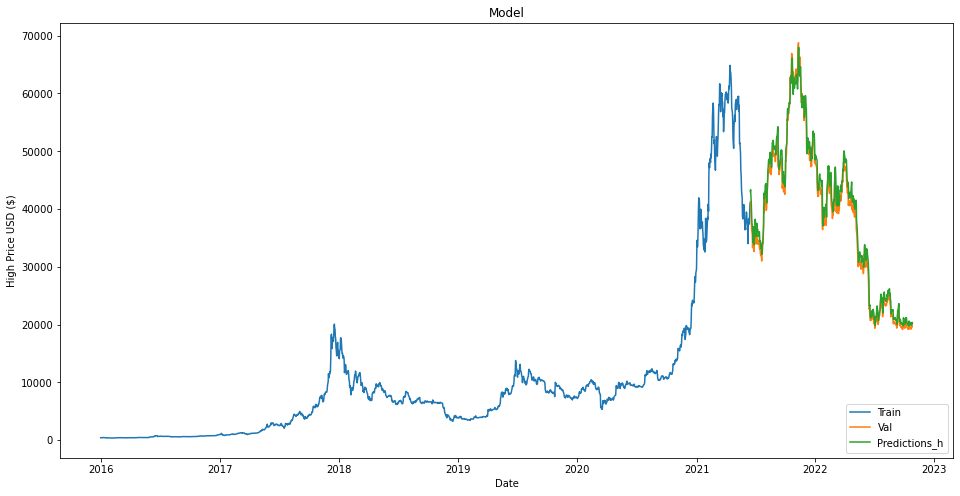

In [150]:
data = stock_data.filter(['High'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions_h
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('High Price USD ($)')
plt.plot(train)
plt.plot(validation[['High', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions_h'], loc='lower right')
plt.show()

C:\Users\JeanPhilippeNdri\AppData\Local\Temp\ipykernel_23140\3598354110.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



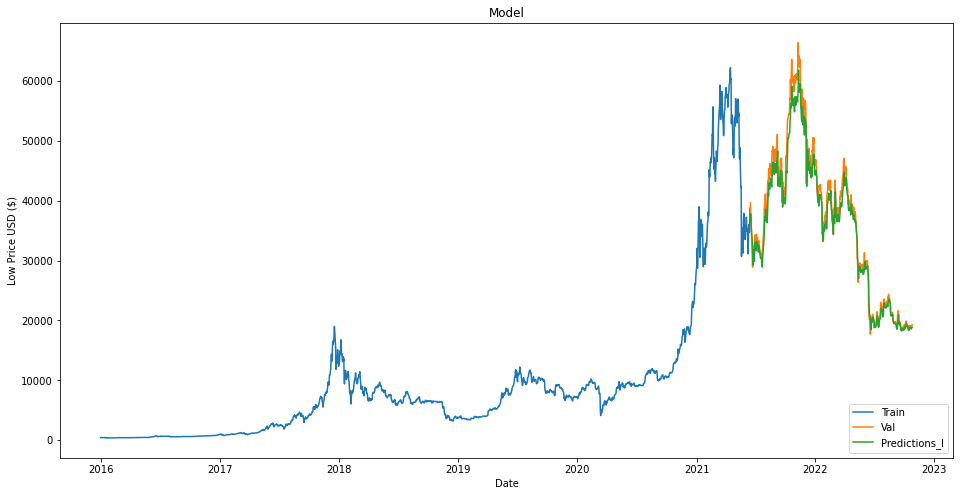

In [151]:
data = stock_data.filter(['Low'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions_l
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Low Price USD ($)')
plt.plot(train)
plt.plot(validation[['Low', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions_l'], loc='lower right')
plt.show()

C:\Users\JeanPhilippeNdri\AppData\Local\Temp\ipykernel_23140\288284564.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



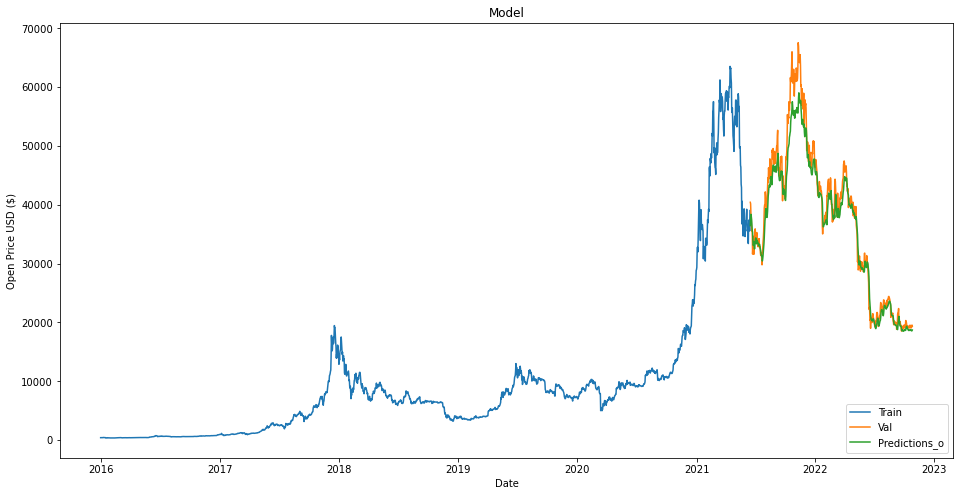

In [153]:
data = stock_data.filter(['Open'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions_o
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Open Price USD ($)')
plt.plot(train)
plt.plot(validation[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions_o'], loc='lower right')
plt.show()

C:\Users\JeanPhilippeNdri\AppData\Local\Temp\ipykernel_23140\154904543.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



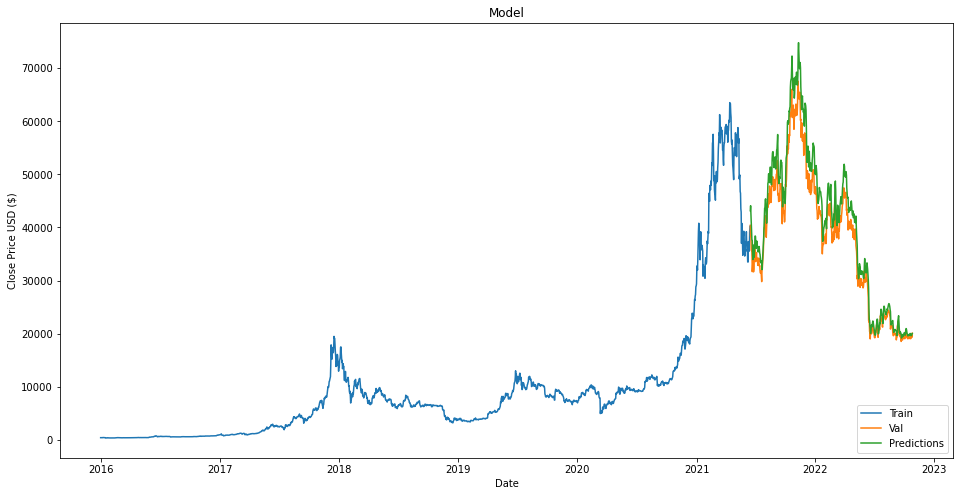

In [154]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [70]:
X_input = stock_data.iloc[-60:].Open.values               # getting last 60 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,60,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 60, 1)


array([[[0.4503275 ],
        [0.3926118 ],
        [0.2816137 ],
        [0.45974435],
        [0.32968143],
        [0.39507813],
        [0.41477518],
        [0.37402448],
        [0.33825327],
        [0.37899481],
        [0.33440997],
        [0.07898009],
        [0.19685287],
        [0.2068088 ],
        [0.74078384],
        [0.81939844],
        [0.84327374],
        [1.        ],
        [0.43001756],
        [0.44506497],
        [0.30477124],
        [0.32380449],
        [0.41507806],
        [0.23037817],
        [0.2634835 ],
        [0.09294986],
        [0.        ],
        [0.22876958],
        [0.19869002],
        [0.10468542],
        [0.07017512],
        [0.17910344],
        [0.1485525 ],
        [0.23277781],
        [0.27073945],
        [0.23364472],
        [0.20256285],
        [0.13277053],
        [0.28381074],
        [0.46946306],
        [0.42388864],
        [0.37085515],
        [0.26367541],
        [0.2300931 ],
        [0.23763513],
        [0

C:\Users\JeanPhilippeNdri\AppData\Local\Temp\ipykernel_23140\154904543.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



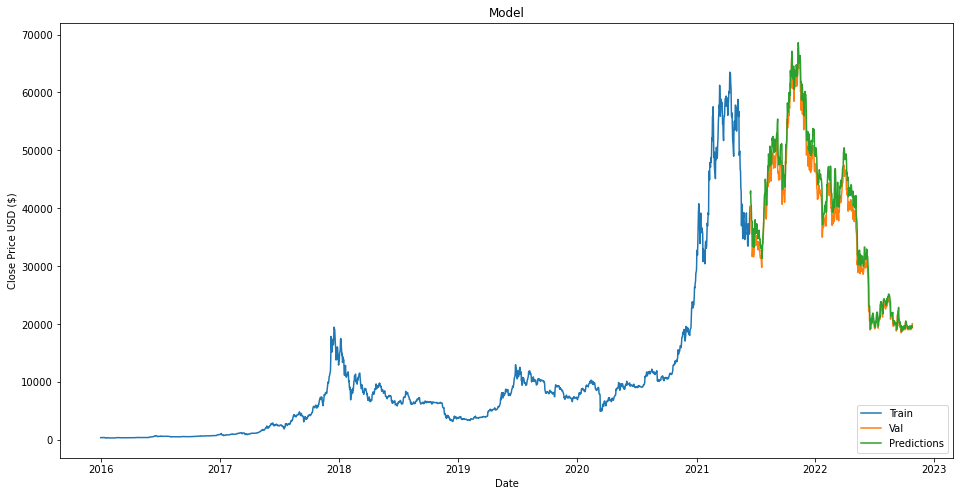

In [71]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [72]:
import plotly.graph_objects as go

fig=go.Figure()
#fig.add_trace(go.Scatter(train),mode='line')
#fig.add_trace(go.Scatter(validation[['Close', 'Predictions']]),mode='line')

In [73]:
fig = px.line(train,title='Stock Prices History')
fig.show()
fig = px.line(validation[['Close', 'Predictions']],title='Stock Prices prediction')
fig.show()

In [75]:
LSTM_prediction = scaler.inverse_transform(model.predict(X_input))
print("LSTM prediction, Open price prediction for 10/26/2022 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 48ms/step
LSTM prediction, Open price prediction for 10/26/2022 : 19279.24
